# Imports

In [1]:
from sklearn import datasets as ds # datasets: Contém vários conjuntos de dados de exemplo
from sklearn import model_selection as ms # model_selection: contém ferramentas para dividir os dados em conjuntos de treinamento e teste e métodos para validação cruzada
from sklearn import tree as tr # tree: contém métodos para criar e manipular árvores de decisão
from sklearn import metrics as mt # metrics: contém métodos para avaliar a performance de modelos de machine learning
import pandas as pd # manipulação e análise de dados
from matplotlib import pyplot as plt # criar visualizações gráficas
import numpy as np # cálculos matemáticos e operações em arrays

# Dados Sintéticos

In [2]:
# Definindo o número de amostras do conjunto de dados
n_samples = 20000

# Definindo o número de características do conjunto de dados
n_features = 2

# Definindo o número de características informativas (relevantes para a classificação, ou seja, que realmente influenciam a saída de classificação)
n_informatives = 2

# Definindo o número de características redundantes (derivadas das características informativas, combinações lineares das características informativas)
n_redundant = 0

# Definindo a semente aleatória para garantir a reprodutibilidade dos resultados
random_state = 0

# Gerando um conjunto de dados sintético para classificação
# x contém as características e y contém as etiquetas (classes) correspondentes.
x, y = ds.make_classification(n_samples=n_samples,
                              n_features=n_features,
                              n_informative=n_informatives,
                              n_redundant=n_redundant,
                              random_state=random_state)

# Dividindo o conjunto de dados em dados de treinamento e dados de produção (para avaliação posterior)
# x, x_prod, y, y_prod = ms.train_test_split(...): Divide o conjunto de dados em dois subconjuntos: um para treinamento (x e y) e outro para produção (avaliação) (x_prod e y_prod). 
# A divisão é feita na proporção de 80% para treinamento e 20% para produção, definida pelo parâmetro test_size=0.2. 
# A semente aleatória é usada para garantir que a divisão seja reprodutível.
x, x_prod, y, y_prod = ms.train_test_split(x, y, test_size=0.2, random_state=random_state)

In [8]:
df = pd.DataFrame(x)
df.shape

(16000, 2)

In [9]:
print(f'Formato de x: {pd.DataFrame(x).shape}\nFormato de x_prod: {pd.DataFrame(x_prod).shape}\nFormato de y: {pd.DataFrame(y).shape}\nFormato de y_prod: {pd.DataFrame(y_prod).shape}')

Formato de x: (16000, 2)
Formato de x_prod: (4000, 2)
Formato de y: (16000, 1)
Formato de y_prod: (4000, 1)


# Não há separação dos dados

In [25]:
# Cria uma instância de um classificador de árvore de decisão. A profundidade máxima limita o número de níveis da árvore, ajudando a controlar o overfitting.
model = tr.DecisionTreeClassifier(max_depth=38)

# Treina o modelo de árvore de decisão usando os dados de treinamento x (características) e y (etiquetas).
model.fit( x,y )

# Usa o modelo treinado para prever as etiquetas dos dados de treinamento x. As previsões são armazenadas em yhat.
yhat = model.predict(x)

# Calcula a acurácia do modelo comparando as etiquetas verdadeiras y com as previsões yhat. A acurácia é a proporção de previsões corretas feitas pelo modelo.
acc = mt.accuracy_score( y, yhat)
print(f'Accuracy Over Training: {acc}')

Accuracy Over Training: 1.0


Quando a saída é Accuracy Over Training: 1.0, isso significa que o modelo de árvore de decisão acertou todas as previsões nos dados de treinamento. Aqui estão algumas considerações e possíveis implicações desse resultado:

Possíveis Implicações:
Overfitting:

Definição: Overfitting ocorre quando o modelo se ajusta muito bem aos dados de treinamento, incluindo o ruído e as características específicas do conjunto de dados de treinamento, mas não generaliza bem para novos dados.
Sinal de Overfitting: Uma acurácia de 1.0 (ou 100%) no conjunto de treinamento é um forte indicativo de overfitting, especialmente quando a profundidade máxima da árvore (max_depth=38) é alta. Árvores de decisão profundas podem memorizar os dados de treinamento.
Complexidade do Modelo:

Profundidade da Árvore: A profundidade máxima de 38 é bastante grande, o que permite à árvore capturar muitos detalhes dos dados de treinamento. Isso pode levar ao overfitting.
Simplificação: Você pode tentar reduzir a profundidade máxima da árvore para ver se isso melhora a generalização do modelo nos dados de teste.

### Publicação do Modelo em Produção

In [27]:
# Classificando os dados de produção (dados de teste) usando o modelo treinado
yhat_prod = model.predict( x_prod )

# Calculando a acurácia do modelo nos dados de produção
acc_prod = mt.accuracy_score( y_prod, yhat_prod)

print(f'Accuracy Over Production: {acc_prod}')

Accuracy Over Production: 0.85275


Comparação com a Acurácia de Treinamento:

Se a acurácia de treinamento foi 1.0 e a acurácia de produção é 0.85275, isso sugere que o modelo está sofrendo de overfitting. O modelo está se ajustando muito bem aos dados de treinamento, mas não generaliza tão bem para os dados de produção.
Por que isso acontece?: A profundidade máxima da árvore (max_depth=38) pode ser muito alta, permitindo que a árvore memorize os dados de treinamento em vez de aprender padrões gerais.

### Estratégia Treino-Teste

In [10]:
# Separa os dados em Treinamento e Teste
x_train, x_test, y_train, y_test = ms.train_test_split(x, y, test_size=0.2, random_state=random_state)

Separação dos Dados:
- x_train, x_test, y_train, y_test = ms.train_test_split(x, y, test_size=0.2, random_state=random_state):
- x_train e y_train são os dados de características e etiquetas que serão usados para treinar o modelo.
- x_test e y_test são os dados de características e etiquetas que serão usados para testar o modelo.
- test_size=0.2 especifica que 20% dos dados serão reservados para o conjunto de teste, enquanto 80% serão usados para treinamento.
- random_state=random_state garante que a divisão dos dados seja reproduzível, ou seja, você obterá a mesma divisão dos dados se executar o código novamente com a mesma semente aleatória.

In [13]:
# Modelo treinado com os dados de treinamento
model = tr.DecisionTreeClassifier( max_depth=6)
model.fit(x_train, y_train )

# Classificação sobre os dados de teste
yhat_test = model.predict( x_test )
acc_test = mt.accuracy_score(y_test, yhat_test)

print(f'Accuracy Over test: {acc_test}')


Accuracy Over test: 0.886875


### Escolha dos parâmetros do algoritmo

In [16]:
# Definindo uma lista de profundidades para testar
values = [i for i in range(1,60)]

# Inicializando uma lista para armazenar as acurácias de teste para diferentes profundidades
test_score = []

# Iterando sobre cada valor de profundidade
for i in values:
    # Modelo treinado com os dados de treinamento, para cada valor de profundidade
    model = tr.DecisionTreeClassifier( max_depth=i)
    model.fit(x_train, y_train )

    #    # Classificando os dados de teste (x_test) usando o modelo treinado com o valor atual de profundidade
    yhat_test = model.predict( x_test )
    acc_test = mt.accuracy_score(y_test, yhat_test)  # Calculando a acurácia do modelo nos dados de teste

    test_score.append(acc_test)

Análise do Resultado

Após executar esse código, você terá uma lista (test_score) que contém a acurácia de teste para cada profundidade da árvore de decisão de 1 a 59. Isso permite que você visualize como a profundidade da árvore afeta o desempenho do modelo.

Você pode usar a lista test_score para plotar um gráfico e visualizar o desempenho do modelo em função da profundidade. Isso pode ajudar a identificar a profundidade ótima da árvore que oferece o melhor equilíbrio entre ajuste e generalização. Aqui está um exemplo de como você pode fazer isso:

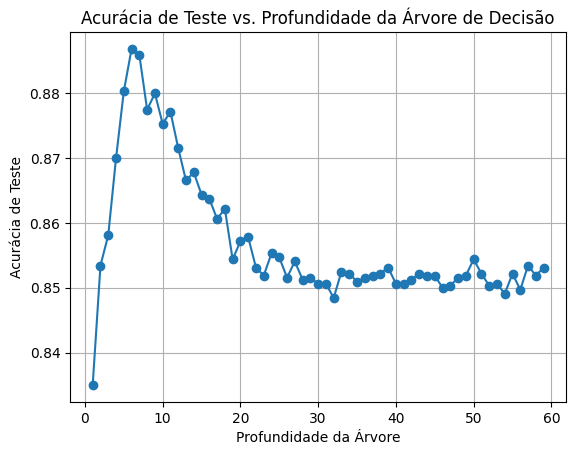

In [15]:
#plt.plot(values, test_score, '-o', label='Test')
# Plotando a acurácia de teste em função da profundidade da árvore
plt.plot(values, test_score, marker='o')
plt.xlabel('Profundidade da Árvore')
plt.ylabel('Acurácia de Teste')
plt.title('Acurácia de Teste vs. Profundidade da Árvore de Decisão')
plt.grid(True)

In [19]:
# Encontrando a acurácia máxima obtida
max_accuracy = max(test_score)

# Encontrando o índice da acurácia máxima na lista test_score
best_depth_index = test_score.index(max_accuracy)

# Correspondendo o índice à profundidade
best_depth = values[best_depth_index]

# Imprimindo a acurácia máxima e a profundidade correspondente
print(f'Máxima Acurácia de Teste: {max_accuracy}')
print(f'Profundidade Ótima: {best_depth}')

Máxima Acurácia de Teste: 0.886875
Profundidade Ótima: 6


### Publicacao do algoritmo em Producao

In [23]:
# Criando e configurando o modelo de árvore de decisão com profundidade máxima de 6
model_last = tr.DecisionTreeClassifier(max_depth=6)

# Concatenando os dados de treinamento e teste para treinar o modelo com todo o conjunto de dados disponível
x_combined = np.concatenate((x_train, x_test))
y_combined = np.concatenate((y_train, y_test))

# Treinando o modelo com todos os dados combinados
model_last.fit(x_combined, y_combined)


# Classificando os dados de produção (dados de teste) usando o modelo treinado
yhat_prod = model_last.predict(x_prod)

# Calculando a acurácia do modelo nos dados de produção
acc_prod = mt.accuracy_score(y_prod, yhat_prod)

# Imprimindo a acurácia do modelo nos dados de produção
print(f'Accuracy Over production: {acc_prod}')

Accuracy Over production: 0.88175


# Estratégia de Treino-Validação-Teste

In [38]:
# Separação entre treino e validação
x_train, x_val, y_train, y_val = ms.train_test_split( x_train, y_train, test_size=0.2 ) # Aqui, 20% dos dados de treinamento são reservados para validação.

In [33]:
values = [i for i in range(1,60)]

val_score = []
for i in values:
    model = tr.DecisionTreeClassifier(max_depth=i)
    model.fit( x_train, y_train)
    # classify
    yhat_val = model.predict( x_val )
    acc_val = mt.accuracy_score(y_val, yhat_val )
    val_score.append(acc_val)

# Encontrando a acurácia máxima obtida
max_accuracy = max(val_score)

# Encontrando o índice da acurácia máxima na lista test_score
best_depth_index = val_score.index(max_accuracy)

# Correspondendo o índice à profundidade
best_depth = values[best_depth_index]

7

Aqui, max_accuracy é a melhor acurácia obtida, best_depth_index é a posição dessa acurácia na lista, e best_depth é a profundidade da árvore associada a essa acurácia máxima.


In [39]:
# Modelo treinado com os dados de treinamento
model = tr.DecisionTreeClassifier( max_depth=best_depth)
model.fit(x_train, y_train )

# Classificação sobre os dados de teste
yhat_val = model.predict( x_val )
acc_val = mt.accuracy_score(y_val, yhat_val )

print(f'Accuracy Over validation: {acc_val}')


Accuracy Over validation: 0.8701171875


In [40]:
# Modelo treinado sobre training + validation
model_last = tr.DecisionTreeClassifier(max_depth=best_depth)
model_last.fit(np.concat((x_train, x_val)), np.concat((y_train, y_val)))
# classify
yhat_test = model_last.predict(x_test)
acc_test = mt.accuracy_score(y_test, yhat_test)

print(f'Accuracy over test: {acc_test}')

Accuracy over test: 0.8875


In [41]:
# classificaçao sobre os dados de teste
yhat_prod = model_last.predict( x_prod )
acc_prod = mt.accuracy_score(y_prod, yhat_prod)

print(f'Accuracy over production: {acc_prod}')



Accuracy over production: 0.87975
